In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('/content/CloudWatch_Traffic_Web_Attack.csv')

In [27]:
df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [28]:
df.columns

Index(['bytes_in', 'bytes_out', 'creation_time', 'end_time', 'src_ip',
       'src_ip_country_code', 'protocol', 'response.code', 'dst_port',
       'dst_ip', 'rule_names', 'observation_name', 'source.meta',
       'source.name', 'time', 'detection_types'],
      dtype='object')

In [29]:
for cols in df.columns:
  print(df[cols].value_counts())
  print("")

bytes_in
5238       4
3976       3
3206       3
3996       2
3102       2
          ..
4801644    1
22790      1
29040      1
27938      1
1215594    1
Name: count, Length: 260, dtype: int64

bytes_out
11674      7
11038      6
11778      5
11570      4
14760      3
          ..
264        1
13180      1
3190       1
1561220    1
5862       1
Name: count, Length: 239, dtype: int64

creation_time
2024-04-26T09:00:00Z    17
2024-04-26T08:50:00Z    13
2024-04-26T09:40:00Z    11
2024-04-26T09:50:00Z    11
2024-04-25T23:10:00Z    11
2024-04-25T23:20:00Z    11
2024-04-25T23:00:00Z    10
2024-04-26T08:20:00Z    10
2024-04-26T01:30:00Z    10
2024-04-26T01:20:00Z    10
2024-04-26T00:40:00Z    10
2024-04-26T01:00:00Z    10
2024-04-26T00:10:00Z    10
2024-04-26T01:10:00Z     9
2024-04-26T09:30:00Z     9
2024-04-26T09:10:00Z     9
2024-04-25T23:50:00Z     9
2024-04-26T01:40:00Z     9
2024-04-26T00:30:00Z     9
2024-04-25T23:40:00Z     9
2024-04-26T00:00:00Z     8
2024-04-25T23:30:00Z     8
2024-04

Cols with no variation:
['protocol', 'response.code', 'dst_port', 'dst_ip', 'rule_names', 'observation_name', 'source.meta','source.name', 'detection_types']

In [30]:
# removing cols with no variance
df = df.drop(columns=[
    "protocol",
    "response.code",
    "dst_port",
    "rule_names",
    "observation_name",
    "source.name",
    "detection_types",
    "dst_ip",
    "source.meta"  # only if it's the same in all rows
])

In [31]:
df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,time
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,2024-04-25T23:00:00Z
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,2024-04-25T23:00:00Z
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,2024-04-25T23:00:00Z
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,2024-04-25T23:00:00Z
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,2024-04-25T23:00:00Z


In [32]:
df.columns

Index(['bytes_in', 'bytes_out', 'creation_time', 'end_time', 'src_ip',
       'src_ip_country_code', 'time'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   time                 282 non-null    object
dtypes: int64(2), object(5)
memory usage: 15.6+ KB


In [35]:
# Convert to datetime
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['time'] = pd.to_datetime(df['time'])

In [37]:
# Duration feature
df['duration'] = (df['end_time'] - df['creation_time']).dt.total_seconds()

In [38]:
# Extract features
df['creation_hour'] = df['creation_time'].dt.hour
df['creation_day'] = df['creation_time'].dt.day

df['event_hour'] = df['time'].dt.hour
df['event_day'] = df['time'].dt.day

df['bytes_total'] = df['bytes_in'] + df['bytes_out']

In [39]:
df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,time,duration,creation_hour,creation_day,event_hour,event_day,bytes_total
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,2024-04-25 23:00:00+00:00,600.0,23,25,23,25,18592
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,2024-04-25 23:00:00+00:00,600.0,23,25,23,25,49098
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,2024-04-25 23:00:00+00:00,600.0,23,25,23,25,41974
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,2024-04-25 23:00:00+00:00,600.0,23,25,23,25,44824
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,2024-04-25 23:00:00+00:00,600.0,23,25,23,25,20418


In [23]:
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['duration'] = (df['end_time'] - df['creation_time']).dt.total_seconds()

# If some durations are negative = crosses midnight:
df.loc[df['duration'] < 0, 'duration'] += 24 * 3600


In [24]:
df['hour'] = df['creation_time'].dt.hour
df['day'] = df['creation_time'].dt.day
df['bytes_total'] = df['bytes_in'] + df['bytes_out']



*  duration = ent_time - creation_time (in secs)
*  creation_hour = hour encoded from creation_time
*  event_hour = hour encoded from time col
*  bytes_total = bytes_in + bytes_out
    *   high bytes_total = unusual activity
    *   but need to consider duration too









In [40]:
df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,time,duration,creation_hour,creation_day,event_hour,event_day,bytes_total
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,2024-04-25 23:00:00+00:00,600.0,23,25,23,25,18592
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,2024-04-25 23:00:00+00:00,600.0,23,25,23,25,49098
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,2024-04-25 23:00:00+00:00,600.0,23,25,23,25,41974
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,2024-04-25 23:00:00+00:00,600.0,23,25,23,25,44824
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,2024-04-25 23:00:00+00:00,600.0,23,25,23,25,20418


In [41]:
df.columns

Index(['bytes_in', 'bytes_out', 'creation_time', 'end_time', 'src_ip',
       'src_ip_country_code', 'time', 'duration', 'creation_hour',
       'creation_day', 'event_hour', 'event_day', 'bytes_total'],
      dtype='object')

In [42]:
df['src_ip'].value_counts()

,count
src_ip,
165.225.209.4,29
165.225.26.101,28
155.91.45.242,28
136.226.67.101,28
147.161.131.1,21
165.225.240.79,18
136.226.77.103,17
147.161.161.82,16
165.225.212.255,15


/tmp/ipython-input-524165265.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette="coolwarm")


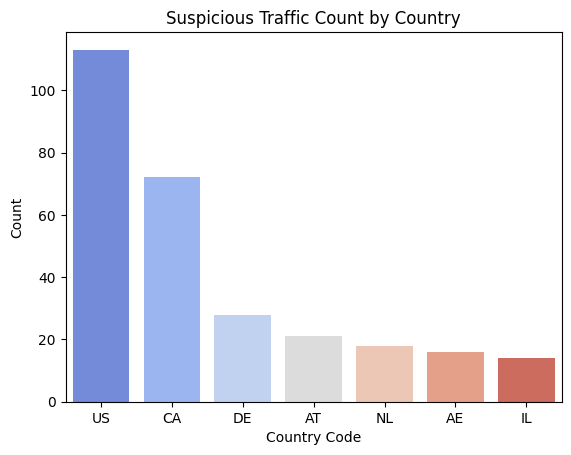

In [66]:
country_counts = df['src_ip_country_code'].value_counts()

sns.barplot(x=country_counts.index, y=country_counts.values, palette="coolwarm")
plt.title("Suspicious Traffic Count by Country")
plt.ylabel("Count")
plt.xlabel("Country Code")
plt.show()

src_ip
165.225.209.4      29
165.225.26.101     28
155.91.45.242      28
136.226.67.101     28
147.161.131.1      21
165.225.240.79     18
136.226.77.103     17
147.161.161.82     16
165.225.212.255    15
94.188.248.74      14
Name: count, dtype: int64


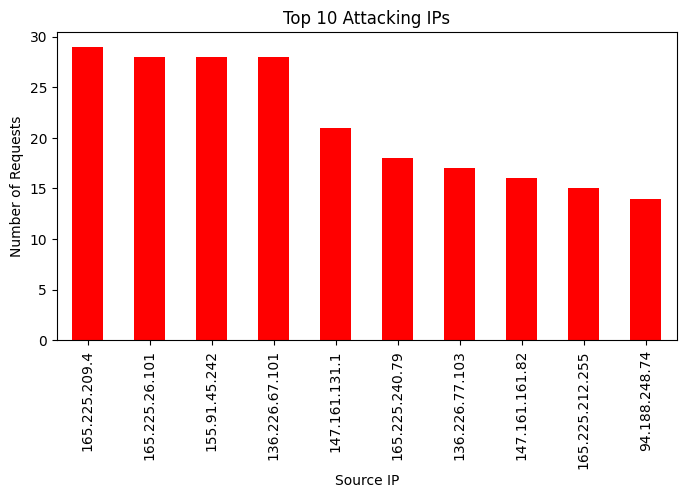

In [43]:
top_ips = df['src_ip'].value_counts().head(10)
print(top_ips)

# Plot
import matplotlib.pyplot as plt
top_ips.plot(kind='bar', color='red', figsize=(8,4))
plt.title("Top 10 Attacking IPs")
plt.ylabel("Number of Requests")
plt.xlabel("Source IP")
plt.show()

In [44]:
ip_bytes = df.groupby('src_ip')[['bytes_in','bytes_out']].mean().sort_values(by='bytes_in', ascending=False).head(10)
print(ip_bytes)

                     bytes_in      bytes_out
src_ip                                      
155.91.45.242    1.123967e+07  698258.107143
165.225.240.79   1.091090e+06   40074.222222
136.226.64.114   4.460231e+04   16033.692308
165.225.212.255  3.227373e+04   11635.733333
165.225.33.6     3.000517e+04   20344.333333
165.225.213.7    2.871636e+04   11472.909091
136.226.67.101   2.373561e+04   29864.285714
136.226.77.103   2.341706e+04   11928.117647
165.225.209.4    1.257117e+04   20370.413793
165.225.26.101   1.010857e+04   15572.857143


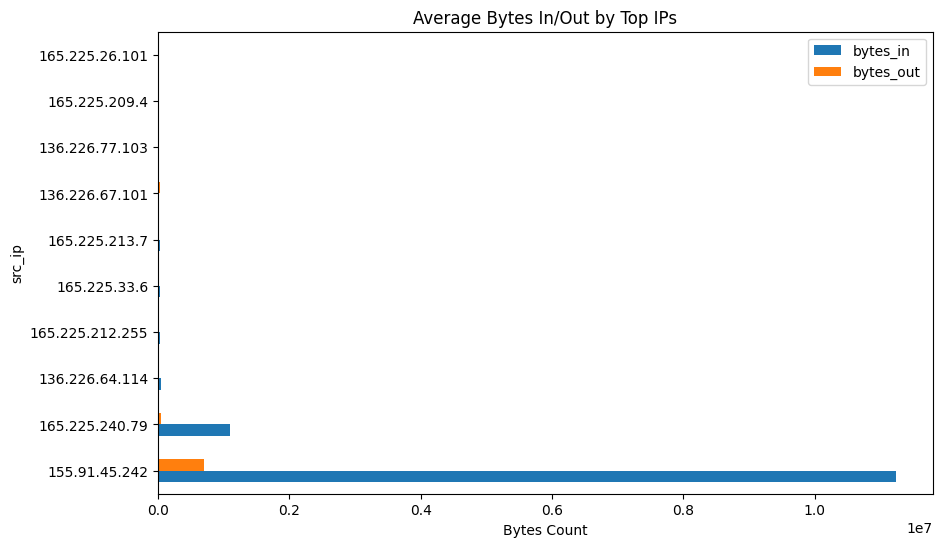

In [45]:
ip_bytes.plot(kind='barh', figsize=(10,6))
plt.title("Average Bytes In/Out by Top IPs")
plt.xlabel("Bytes Count")
plt.show()

The IP address 155.91.45.242 is highly suspicious as it has an average inbound traffic (bytes_in) of ~11.2 million bytes, which is 10× higher than any other IP in the dataset.
This unusual behavior indicates that the IP might be performing large data uploads or a potential DDoS flood attack on the server.

In [46]:
ip_hour_activity = df.groupby(['src_ip', 'creation_hour']).size().unstack(fill_value=0)
print(ip_hour_activity.head(10))

creation_hour    0   1   8   9   23
src_ip                             
136.226.64.114    2   2   3   3   3
136.226.67.101    5   6   6   6   5
136.226.77.103    3   4   2   4   4
136.226.80.97     0   2   4   2   3
147.161.131.1     2   5   5   5   4
147.161.161.82    4   4   3   4   1
155.91.45.242     5   6   6   6   5
165.225.209.4     6   6   5   6   6
165.225.212.255   5   3   2   1   4
165.225.213.7     1   3   2   3   2


In [47]:
ip_country_counts = df.groupby(['src_ip_country_code', 'src_ip']).size().reset_index(name='count')
ip_country_counts = ip_country_counts.sort_values(by='count', ascending=False).head(10)
print(ip_country_counts)

   src_ip_country_code           src_ip  count
3                   CA    165.225.209.4     29
6                   DE   165.225.26.101     28
10                  US   136.226.67.101     28
12                  US    155.91.45.242     28
1                   AT    147.161.131.1     21
8                   NL   165.225.240.79     18
2                   CA   136.226.77.103     17
0                   AE   147.161.161.82     16
4                   CA  165.225.212.255     15
7                   IL    94.188.248.74     14


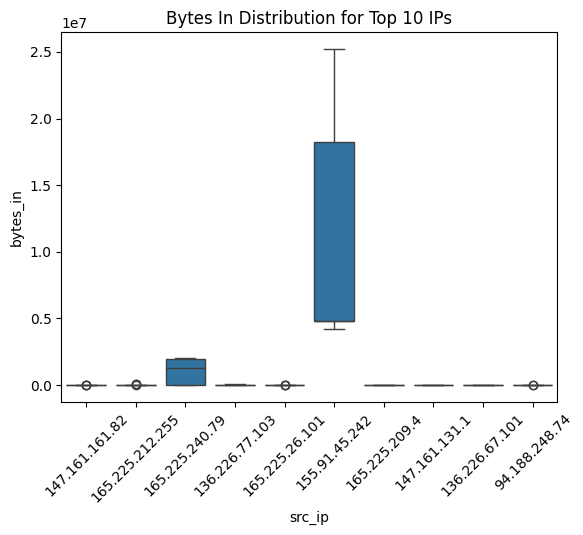

In [48]:
top_10_ips = df['src_ip'].value_counts().head(10).index
df_top_ips = df[df['src_ip'].isin(top_10_ips)]

import seaborn as sns
sns.boxplot(data=df_top_ips, x='src_ip', y='bytes_in')
plt.xticks(rotation=45)
plt.title("Bytes In Distribution for Top 10 IPs")
plt.show()

In [49]:
df_ml = df.drop(columns=['creation_time','end_time','time','src_ip'])

In [54]:
df_ml.head()

,bytes_in,bytes_out,src_ip_country_code,duration,creation_hour,creation_day,event_hour,event_day,bytes_total
0,5602,12990,AE,600.0,23,25,23,25,18592
1,30912,18186,US,600.0,23,25,23,25,49098
2,28506,13468,CA,600.0,23,25,23,25,41974
3,30546,14278,US,600.0,23,25,23,25,44824
4,6526,13892,NL,600.0,23,25,23,25,20418


In [51]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bytes_in             282 non-null    int64  
 1   bytes_out            282 non-null    int64  
 2   src_ip_country_code  282 non-null    object 
 3   duration             282 non-null    float64
 4   creation_hour        282 non-null    int32  
 5   creation_day         282 non-null    int32  
 6   event_hour           282 non-null    int32  
 7   event_day            282 non-null    int32  
 8   bytes_total          282 non-null    int64  
dtypes: float64(1), int32(4), int64(3), object(1)
memory usage: 15.6+ KB


In [55]:
df_ml["duration"].value_counts()

,count
duration,
600.0,282


In [56]:
df_ml = df_ml.drop(columns=['duration'])

In [57]:
df_ml.head()

,bytes_in,bytes_out,src_ip_country_code,creation_hour,creation_day,event_hour,event_day,bytes_total
0,5602,12990,AE,23,25,23,25,18592
1,30912,18186,US,23,25,23,25,49098
2,28506,13468,CA,23,25,23,25,41974
3,30546,14278,US,23,25,23,25,44824
4,6526,13892,NL,23,25,23,25,20418


In [58]:
df_ml["src_ip_country_code"].value_counts()

,count
src_ip_country_code,
US,113
CA,72
DE,28
AT,21
NL,18
AE,16
IL,14


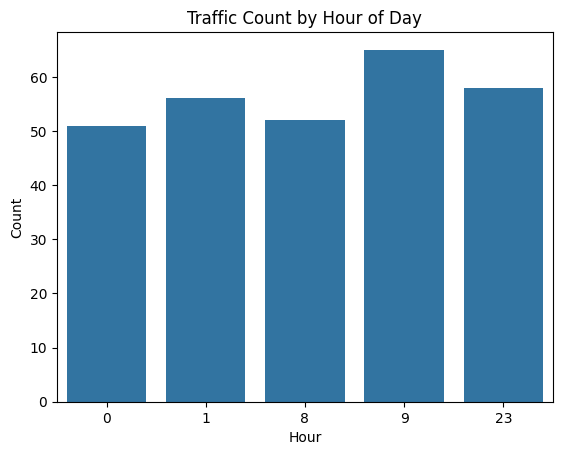

In [67]:
sns.countplot(x=df_ml['creation_hour'])
plt.title("Traffic Count by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

In [59]:
df['src_ip_country_code'] = df['src_ip_country_code'].str.strip()

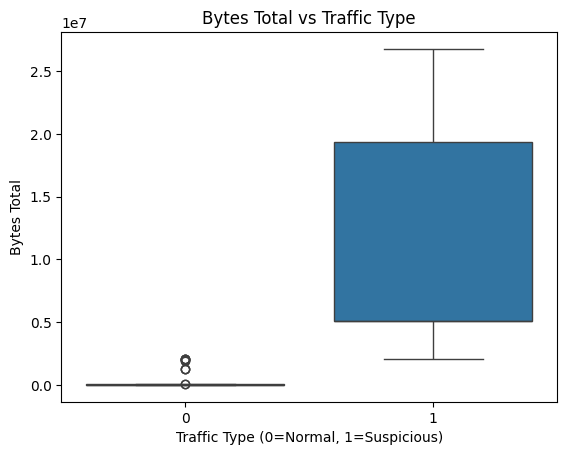

In [69]:
sns.boxplot(x='traffic_type', y='bytes_total', data=df_ml)
plt.title("Bytes Total vs Traffic Type")
plt.xlabel("Traffic Type (0=Normal, 1=Suspicious)")
plt.ylabel("Bytes Total")
plt.show()

In [60]:
df_ml = pd.get_dummies(df_ml, columns=['src_ip_country_code'], dtype=int)

In [61]:
df_ml.head()

,bytes_in,bytes_out,creation_hour,creation_day,event_hour,event_day,bytes_total,src_ip_country_code_AE,src_ip_country_code_AT,src_ip_country_code_CA,src_ip_country_code_DE,src_ip_country_code_IL,src_ip_country_code_NL,src_ip_country_code_US
0,5602,12990,23,25,23,25,18592,1,0,0,0,0,0,0
1,30912,18186,23,25,23,25,49098,0,0,0,0,0,0,1
2,28506,13468,23,25,23,25,41974,0,0,1,0,0,0,0
3,30546,14278,23,25,23,25,44824,0,0,0,0,0,0,1
4,6526,13892,23,25,23,25,20418,0,0,0,0,0,1,0


creating col 'traffic_type' (Target col) since we are working on semi-supervised learning

In [62]:
# Define threshold as 90th percentile
threshold = df_ml['bytes_total'].quantile(0.90)

# Create binary label
df_ml['traffic_type'] = (df_ml['bytes_total'] > threshold).astype(int)

# Check class balance
print(df_ml['traffic_type'].value_counts())

traffic_type
0    253
1     29
Name: count, dtype: int64


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X = df_ml.drop(columns=['traffic_type'])
y = df_ml['traffic_type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)

Train shape: (225, 14)  Test shape: (57, 14)


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create model
model = RandomForestClassifier(random_state=42, class_weight="balanced")

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.83      0.91         6

    accuracy                           0.98        57
   macro avg       0.99      0.92      0.95        57
weighted avg       0.98      0.98      0.98        57

[[51  0]
 [ 1  5]]


In [70]:
sample = X_test.iloc[0]   # pick the first row
print("Sample Input:\n", sample)

pred = model.predict([sample])
print("Predicted:", pred[0], "  Actual:", y_test.iloc[0])

Sample Input:
 bytes_in                   8874
bytes_out                 14968
creation_hour                 0
creation_day                 26
event_hour                    0
event_day                    26
bytes_total               23842
src_ip_country_code_AE        0
src_ip_country_code_AT        0
src_ip_country_code_CA        0
src_ip_country_code_DE        1
src_ip_country_code_IL        0
src_ip_country_code_NL        0
src_ip_country_code_US        0
Name: 63, dtype: int64
Predicted: 0   Actual: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [80]:
def predict(bytes_in, bytes_out, creation_hour, creation_day, event_hour, event_day, country):
    bytes_total = bytes_in + bytes_out

    # One-hot encoding in correct order
    country_cols = ["AE","AT","CA","DE","IL","NL","US"]
    country_encoding = [1 if c == country else 0 for c in country_cols]

    # Combine all features in exact order
    input_data = [
        bytes_in, bytes_out, creation_hour, creation_day, event_hour, event_day, bytes_total
    ] + country_encoding

    input_df = pd.DataFrame([input_data], columns=X.columns)

    result = model.predict(input_df)[0]
    return "Suspicious" if result == 1 else "Normal"

In [81]:
predict(5000, 12000, 23, 25, 23, 25, "US")

'Normal'

In [82]:
predict(2200000, 50000, 10, 20, 10, 20, "DE")

'Normal'

In [83]:
print(X.columns.tolist())


['bytes_in', 'bytes_out', 'creation_hour', 'creation_day', 'event_hour', 'event_day', 'bytes_total', 'src_ip_country_code_AE', 'src_ip_country_code_AT', 'src_ip_country_code_CA', 'src_ip_country_code_DE', 'src_ip_country_code_IL', 'src_ip_country_code_NL', 'src_ip_country_code_US']


In [84]:
predict(1500000, 1000000, 23, 25, 23, 25, "US")
predict(2200000, 50000, 10, 20, 10, 20, "DE")


'Normal'

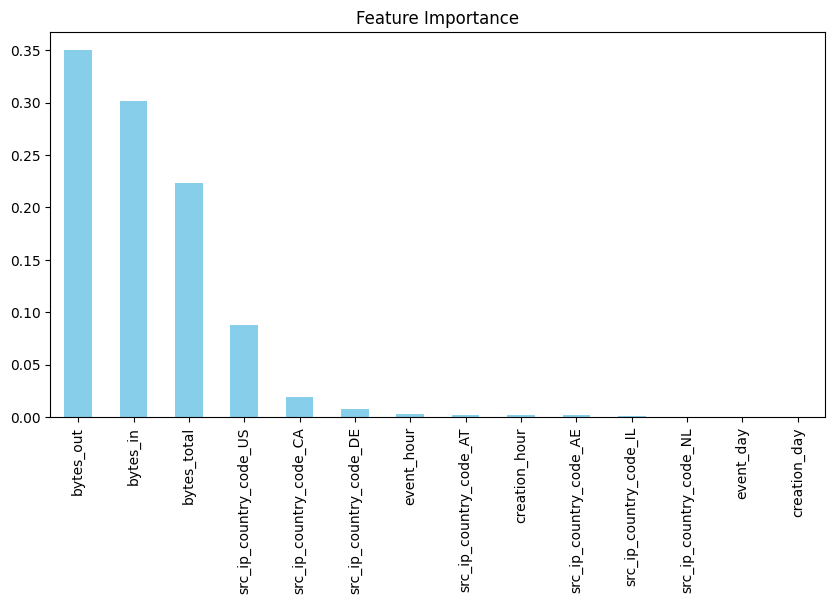

In [85]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Feature Importance")
plt.show()

In [86]:
predict(5000000, 3000000, 23, 25, 23, 25, "US")


'Suspicious'

In [87]:
THRESHOLD = 2100176.1  # From quantile

def hybrid_predict(bytes_in, bytes_out, creation_hour, creation_day, event_hour, event_day, country):
    bytes_total = bytes_in + bytes_out

    # If bytes_total is above threshold → directly suspicious
    if bytes_total > THRESHOLD:
        return "Suspicious (Rule-based)"

    # Else → use ML prediction
    country_cols = ["AE","AT","CA","DE","IL","NL","US"]
    country_encoding = [1 if c == country else 0 for c in country_cols]

    input_data = [
        bytes_in, bytes_out, creation_hour, creation_day, event_hour, event_day, bytes_total
    ] + country_encoding

    input_df = pd.DataFrame([input_data], columns=X.columns)
    result = model.predict(input_df)[0]

    return "Suspicious (Model)" if result == 1 else "Normal"


In [88]:
hybrid_predict(1500000, 1000000, 23, 25, 23, 25, "US")
hybrid_predict(2200000, 50000, 10, 20, 10, 20, "DE")

'Suspicious (Rule-based)'

In [89]:
hybrid_predict(5000, 12000, 23, 25, 23, 25, "US")

'Normal'

In [90]:
import pickle

# Save the model
with open("rf_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save the column names
with open("model_columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

In [91]:
from google.colab import files

files.download("rf_model.pkl")
files.download("model_columns.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>